In [3]:
#A1
import pandas as pd
from sklearn.cluster import KMeans

# CSV data
df = pd.read_csv('the_final_no_changes_data.csv')  

# Remove class labels
data = df.drop(['category'], axis=1)

# Apply k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(data)

# Display the resulting DataFrame with k-means cluster labels
print(df)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


        text  polarity  subjectivity  len  category  kmeans_cluster
0      19285  0.500000      0.600000  126        20               3
1       5915  0.000000      0.000000   95        35               4
2       3193  0.500000      0.150000   98        34               4
3      40844  0.000000      0.100000   51        29               2
4      13732  0.000000      0.000000   34        30               1
...      ...       ...           ...  ...       ...             ...
10495  29121  0.000000      0.000000   28        22               0
10496  35111  0.056548      0.502976  202        20               2
10497  23236 -0.483333      0.533333   88        21               3
10498  30138  0.000000      0.000000  163         3               0
10499  23835  0.100000      0.100000  103        29               3

[10500 rows x 6 columns]


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

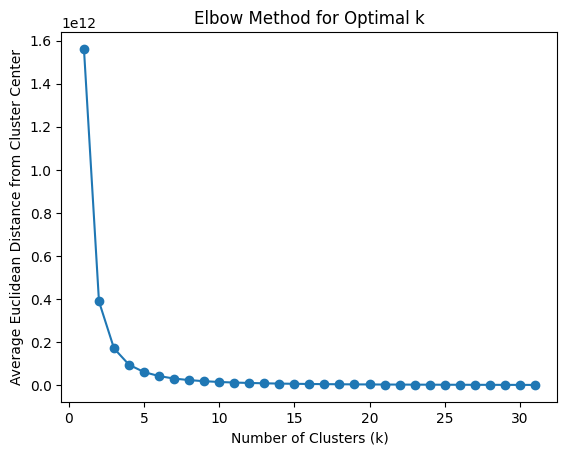

In [4]:
#A2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# CSV data
df = pd.read_csv('the_final_no_changes_data.csv')  

# Remove class labels
data = df.drop(['category'], axis=1)

# Determine the ideal k value using the elbow method
distortions = []
K_range = range(1, 32)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance from Cluster Center')
plt.show()

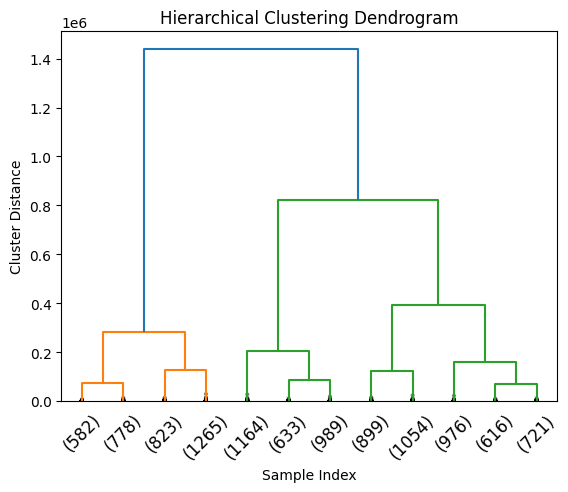

In [5]:
#A3
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# CSV data
df = pd.read_csv('the_final_no_changes_data.csv')  # Replace 'your_data.csv' with the actual file path

# Remove class labels
data = df.drop(['category'], axis=1)

# Apply AgglomerativeClustering with k=5
agglomerative = AgglomerativeClustering(n_clusters=5)
df['agglomerative_cluster'] = agglomerative.fit_predict(data)

# Plot the dendrogram
linkage_matrix = linkage(data, 'ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, leaf_rotation=45., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

In [6]:
#A5
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# CSV data
df = pd.read_csv('the_final_no_changes_data.csv')

# Remove class labels
data = df.drop(['category'], axis=1)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['len'], axis=1), data['len'], test_size=0.2, random_state=42)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_train)

# Identify the features needed to capture 95% of data variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_features_for_95_percent_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Transform the data using the initial KPCs
X_train_transformed = pca_result[:, :num_features_for_95_percent_variance]
X_test_transformed = pca.transform(X_test)[:, :num_features_for_95_percent_variance]

# Assuming you are using a regression model
# Replace 'RandomForestRegressor()' with your actual regressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test_transformed)

# Calculate Mean Squared Error (MSE) as the accuracy metric
mse = mean_squared_error(y_test, y_pred)

# Display the Mean Squared Error
print("Mean Squared Error using transformed dataset:", mse)

Mean Squared Error using transformed dataset: 3845.050206809524


In [7]:
#A5
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# CSV data
df = pd.read_csv('the_final_no_changes_data.csv')

# Remove class labels
data = df.drop(['category'], axis=1)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['len'], axis=1), data['len'], test_size=0.2, random_state=42)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_train)

# Identify the features needed to capture 95% of data variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_features_for_95_percent_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Transform the data using the initial KPCs
X_train_transformed = pca_result[:, :num_features_for_95_percent_variance]
X_test_transformed = pca.transform(X_test)[:, :num_features_for_95_percent_variance]

# Assuming you are using a regression model
# Replace 'RandomForestRegressor()' with your actual regressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test_transformed)

# Define a threshold for accuracy calculation (you can adjust this)
threshold = 5.0  # Example threshold: predictions within 5 units are considered accurate

# Calculate accuracy
accurate_predictions = sum(abs(y_pred - y_test) <= threshold)
total_predictions = len(y_test)
accuracy = accurate_predictions / total_predictions

# Display the accuracy
print(f"Accuracy within {threshold} units: {accuracy * 100:.2f}%")

Accuracy within 5.0 units: 6.38%


In [8]:
#A4
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error

# CSV data
df = pd.read_csv('the_final_no_changes_data.csv')

# Remove class labels
data = df.drop(['category'], axis=1)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['len'], axis=1), data['len'], test_size=0.2, random_state=42)

# Assuming you are using a regression model
# Replace 'RandomForestRegressor()' with your actual regressor
regressor = RandomForestRegressor()

# Sequential Feature Selector
sfs = SequentialFeatureSelector(estimator=regressor, k_features='best', forward=True, scoring='neg_mean_squared_error', cv=5)
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = list(sfs.k_feature_names_)

# Display the selected features
print("Selected features:", selected_features)

Selected features: ['polarity', 'subjectivity']


In [10]:
#A4
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# CSV data
df = pd.read_csv('the_final_no_changes_data.csv')

# Remove class labels
data = df.drop(['category'], axis=1)

# Splitting data into train and test sets
X_train, X_test, _, _ = train_test_split(data.drop(['len'], axis=1), data['len'], test_size=0.2, random_state=42)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_train)

# Observe variances along the principal components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Identify the features needed to capture 95% of data variance
num_features_for_95_percent_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Display the number of features needed
print("Number of features needed to capture 95% of data variance:", num_features_for_95_percent_variance)


Number of features needed to capture 95% of data variance: 1
